In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [2]:
train = pd.read_csv("I:/train.csv")
test = pd.read_csv("I:/test.csv")

# Veri temizliği

In [3]:
#Yaştaki NaN değerleri veri setinin yaş ortalamasıyla doldurmak ideal gibi

#Kabin kolonunu düşürmek gerek, herhangi bir imputation metodu uygulamak için çok az kullanılabilir veri var

#Embarked kolonundaki iki NaN satırı düşürmek gerek
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
train.dropna(subset=["Embarked"], inplace=True)
train.drop("Cabin", axis=1, inplace=True)

In [7]:
#Yaş sütunu hariç her sütunda 889 satır var, Age sütununu da ortalamalarla doldurunca 889 olacak
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [8]:
#Yaş sütununu da ortalama yaşı kullanarak doldurdum
mean_age = train.Age.mean()
train.fillna(value=mean_age, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [9]:
#Object veri tiplerini int64'e çevirerek matematiksel işlem yapılabilecek hale getirelim
train.replace({"male":0, "female":1}, inplace = True)
train.replace({"S":0, "C":1, "Q":2}, inplace = True)

In [10]:
#Yolcu isimleri ve bilet kodları algoritma tarafından kullanılabilecek sayısal girdilere çevrilemez, bu yüzden düşürülmesi gerek.
#Ayrıca PassengerId sütununun da her ne kadar int64 olsa da yorumlanabilir bir sayısal değer olmamasından ötürü düşürülmesi şart.
train.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [11]:
#Veri temiz ve işlenmeye hazır duruyor.
train.info()
train.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Feature engineering

In [12]:
#Kadınlar ve çocuklar daha fazla hayatta kaldığından 
#yaş ortalamasının altındaki kadınları gösteren bir kolon
#belki bir şeyler anlatabilir.
train["Young_Female"] = train[(train["Age"] <= train.Age.mean()) & (train["Sex"] == 1)].Survived
train["Young_Female"].fillna(value=0, inplace=True)
train["Young_Female"] = train["Young_Female"].astype("int64")
for i in train["Young_Female"]:
    i = int(i)
    if i != train.Young_Female.isnull().any():
        train["Young_Female"].replace({i:1})
train.Young_Female.value_counts()

0    784
1    105
Name: Young_Female, dtype: int64

In [13]:
#Yukarıdaki hücre ile aynı işlem sayılır, yalnızca "ve" operatörünü "veya" ile
#değiştirdim. Yani gemidekilerin ortalama yaşında ya da ortalamadan daha genç
#kişiler veya kadın olanları barındıran bir kolon ekledim. Hedef kolon olan
#Survived kolonu ile arasında %87'lik korelasyon çıktı. Modelde kullanılması
#şart olan bir kolon.
train["young_or_female"] = train[(train["Age"] <= train.Age.mean()) | (train["Sex"] == 1)].Survived
train["young_or_female"].fillna(value=0, inplace=True)
train["young_or_female"] = train["young_or_female"].astype("int64")
for i in train["young_or_female"]:
    i = int(i)
    if i != train.young_or_female.isnull().any():
        train["young_or_female"].replace({i:1})
train.young_or_female.value_counts()

0    607
1    282
Name: young_or_female, dtype: int64

In [15]:
#Gemide akrabası olanların yaşam oranıyla alakalı bir farklılık olabilir.
train["has_family"] = train[train["SibSp"] >= 0].SibSp
train["has_family"].astype("int64")
train.has_family.isna().value_counts()

False    889
Name: has_family, dtype: int64

In [14]:
#Aşağıda EDA yaparken fark ettim ki gemideki akraba sayısı 4'ten fazla olup da 
#hayatta kalan olmamış. Bu nedenle bu şartı sağlayan bir kolon yaratmayı denedim,
#fakat bunu karşılayan yalnızca 12 durum olduğundan pek işe yaramaz.
train["crowded_family"] = train[train["SibSp"] > 4].SibSp
train["crowded_family"].fillna(value=0, inplace=True)
train["crowded_family"] = train["crowded_family"].astype("int64")
for i in train["crowded_family"]:
    i = int(i)
    if i != train.crowded_family.isnull().any():
        train["crowded_family"].replace({i:1})
train["crowded_family"].astype("int64")
train.crowded_family.value_counts()

0    877
8      7
5      5
Name: crowded_family, dtype: int64

# Veri görselleştirme

Text(0.5, 1.0, 'Kolonların korelasyon matrisi')

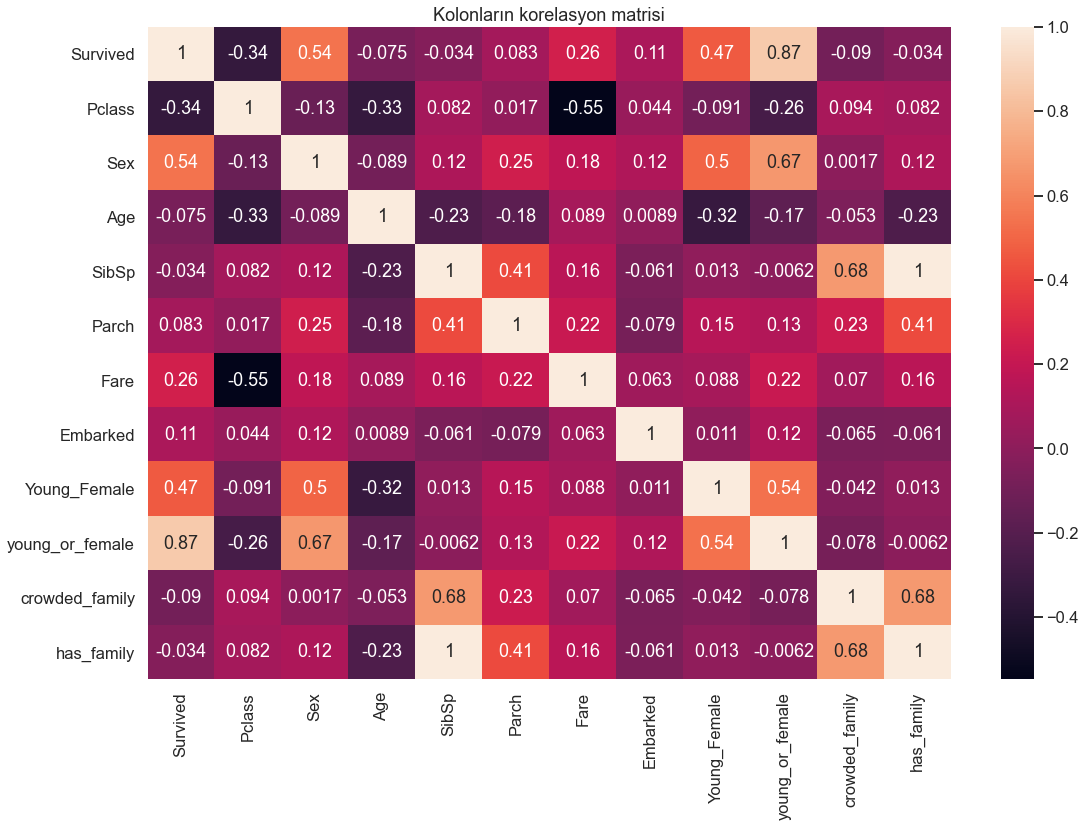

In [32]:
sns.set_context("talk")
ax = plt.subplots(figsize=(18, 12))
sns.heatmap(train.corr(), annot=True)
plt.title("Kolonların korelasyon matrisi")

[Text(0, 0, 'Dead'), Text(0, 0, 'Alive')]

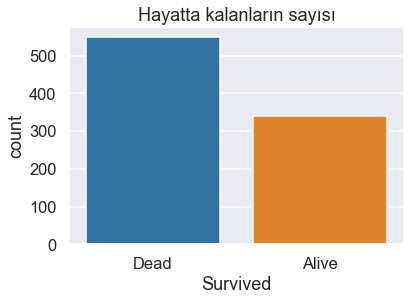

In [17]:
sns.set_context("talk")
sns.set_style("darkgrid")
g = sns.countplot("Survived", data=train)
plt.title("Hayatta kalanların sayısı")
g.set_xticklabels(["Dead", "Alive"])

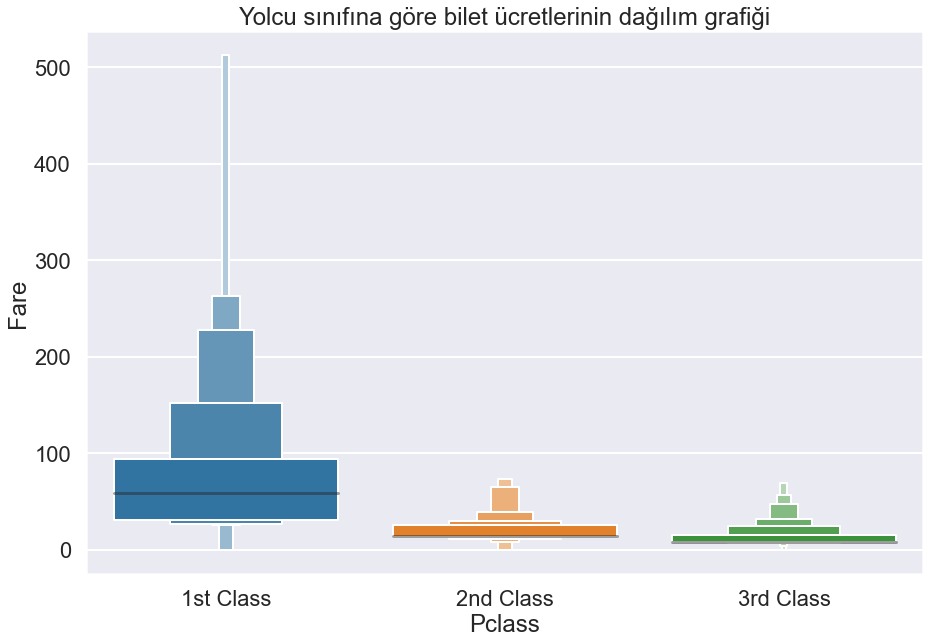

In [18]:
sns.set_context("poster")
ax = plt.subplots(figsize=(15, 10))
g1 = sns.boxenplot("Pclass", "Fare", data=train)
g1.set_xticklabels(["1st Class", "2nd Class", "3rd Class"])
plt.title("Yolcu sınıfına göre bilet ücretlerinin dağılım grafiği")
plt.show()

Text(0.5, 1.0, 'Yolcu sınıfına göre yolcuların ortalama hayatta kalma yüzdeleri')

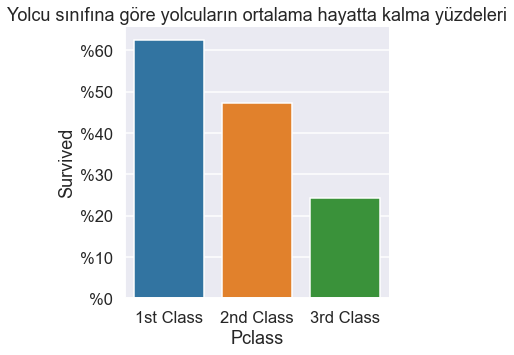

In [19]:
sns.set_context("talk")
g = sns.catplot("Pclass", "Survived", data=train, kind="bar", ci=None)
g.set_yticklabels(["%0", "%10", "%20", "%30", "%40", "%50", "%60"])
g.set_xticklabels(["1st Class", "2nd Class", "3rd Class"])
plt.title("Yolcu sınıfına göre yolcuların ortalama hayatta kalma yüzdeleri")

Text(0.5, 1.0, 'Cinsiyete göre yolcuların ortalama hayatta kalma yüzdeleri')

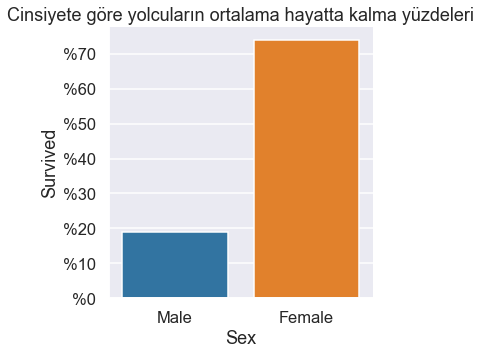

In [20]:
sns.set_context("talk")
g = sns.catplot("Sex", "Survived", data=train, kind="bar", ci=None)
g.set_yticklabels(["%0", "%10", "%20", "%30", "%40", "%50", "%60", "%70"])
g.set_xticklabels(["Male", "Female"])
plt.title("Cinsiyete göre yolcuların ortalama hayatta kalma yüzdeleri")

Text(0.5, 1.0, 'Hayatta kalıp kalmamalarına göre yolcuların yaş dağılımları')

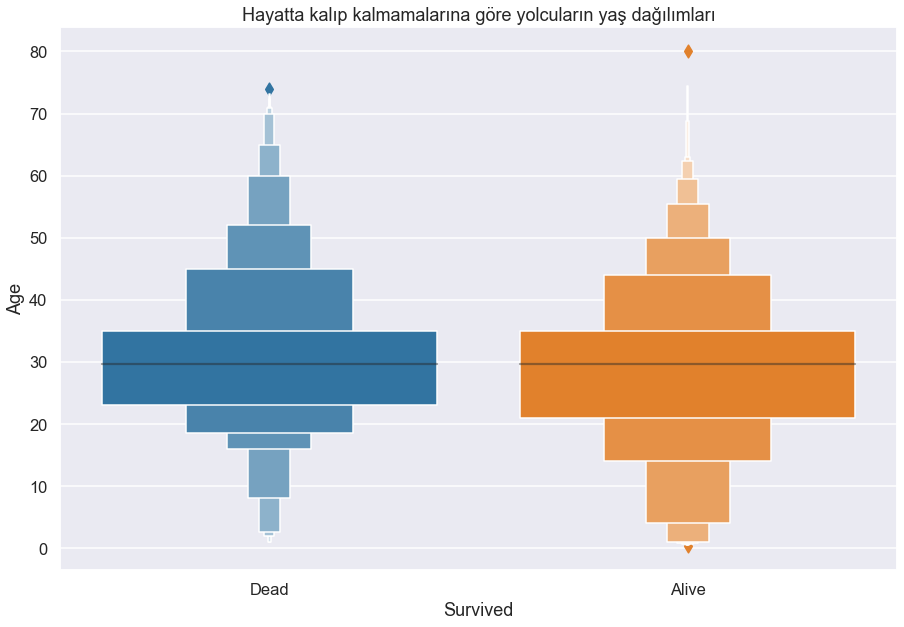

In [21]:
sns.set_context("talk")
ax = plt.subplots(figsize=(15, 10))
a = sns.boxenplot("Survived", "Age", data=train)
a.set_xticklabels(["Dead", "Alive"])
plt.title("Hayatta kalıp kalmamalarına göre yolcuların yaş dağılımları")

Text(0.5, 1.0, 'Hayatta kalıp kalmamalarına göre yolcuların gemideki akraba sayısı')

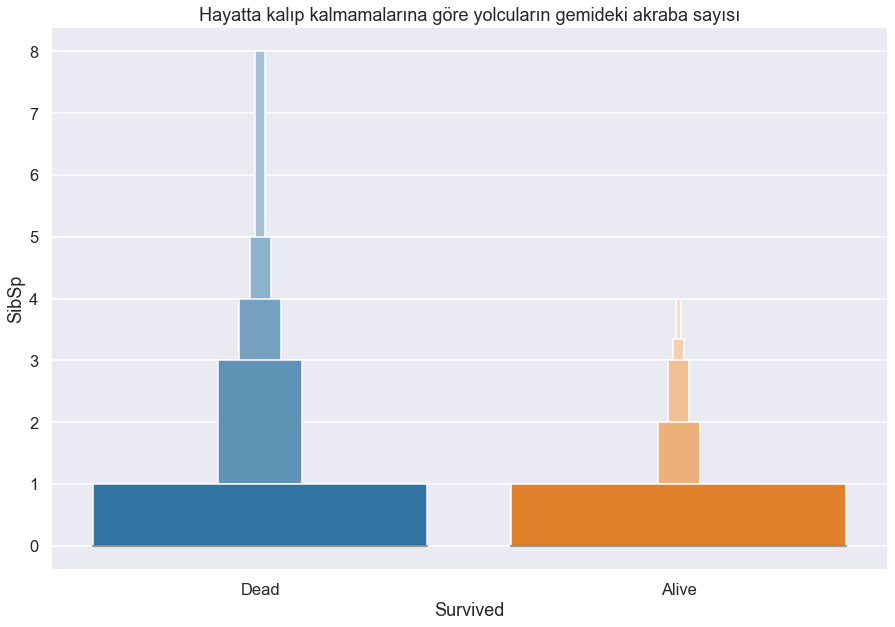

In [22]:
sns.set_context("talk")
ax = plt.subplots(figsize=(15, 10))
a = sns.boxenplot("Survived", "SibSp", data=train)
a.set_xticklabels(["Dead", "Alive"])
plt.title("Hayatta kalıp kalmamalarına göre yolcuların gemideki akraba sayısı")

# Algoritmanın kurulması

In [24]:
#Veri setini X ve y şeklinde ayırarak tahmin edilecek değer olan Survived kolonunu ayıralım
X = train[["Fare", "Pclass", "Sex", "Age", "has_family", "young_or_female"]]
y = np.array(train.Survived)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3)
scaler = StandardScaler().fit(X_train)
standard_x = scaler.transform(X_train)
standard_xtest = scaler.transform(X_test)

In [25]:
knn = KNeighborsClassifier()
params = {"n_neighbors":np.arange(1, 31)}
grid = GridSearchCV(estimator = knn, param_grid = params, cv=5)
grid.fit(standard_x, y_train)
knn_pred = grid.predict(standard_xtest)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       167
           1       0.97      0.83      0.89       100

    accuracy                           0.93       267
   macro avg       0.94      0.91      0.92       267
weighted avg       0.93      0.93      0.92       267



Text(0.5, 1.0, 'k-NN Algoritmasının Sınıflandırma Performansı')

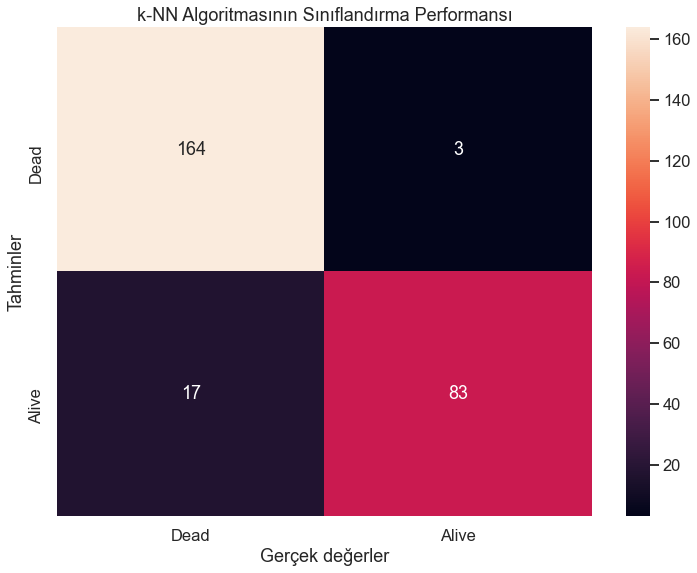

In [26]:
ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, xticklabels=["Dead", "Alive"], yticklabels=["Dead", "Alive"], fmt="g")
plt.ylabel("Tahminler")
plt.xlabel("Gerçek değerler")
plt.title("k-NN Algoritmasının Sınıflandırma Performansı")

In [27]:
print("En yüksek puan:", grid.best_score_)
print("En iyi n_neighbors parametresi:",grid.best_estimator_.n_neighbors)
print("Ortalama model puanı:", grid.cv_results_["mean_test_score"].mean())

En yüksek puan: 0.9356258064516128
En iyi n_neighbors parametresi: 17
Ortalama model puanı: 0.9293690322580647


In [28]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=3)
params_log = {"estimator__C":[0.0001, 0.001, 0.01, 0.1, 1, 1.2, 1.5, 1.8, 2, 2.2, 2.5, 2.7, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.9, 3, 3.1, 3.3, 3.5, 3.8, 10, 100]}
grid_log = GridSearchCV(estimator=rfe, param_grid = params_log, cv=5)
grid_log.fit(standard_x, y_train)
logreg_pred = grid_log.predict(standard_xtest)
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       167
           1       1.00      0.84      0.91       100

    accuracy                           0.94       267
   macro avg       0.96      0.92      0.93       267
weighted avg       0.95      0.94      0.94       267



Text(0.5, 1.0, 'Lojistik Regresyon Algoritmasının Sınıflandırma Performansı')

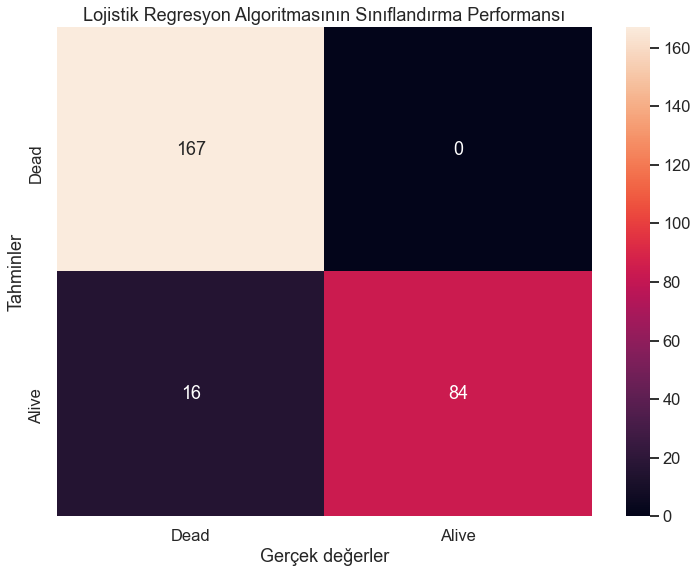

In [29]:
ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, logreg_pred), annot=True, xticklabels=["Dead", "Alive"], yticklabels=["Dead", "Alive"], fmt="g")
plt.ylabel("Tahminler")
plt.xlabel("Gerçek değerler")
plt.title("Lojistik Regresyon Algoritmasının Sınıflandırma Performansı")

In [30]:
print("En yüksek puan:", grid_log.best_score_)
print("En iyi C parametresi:", grid_log.best_estimator_.estimator_)
print("Ortalama model puanı:", grid_log.cv_results_["mean_test_score"].mean())

En yüksek puan: 0.9324129032258064
En iyi C parametresi: LogisticRegression(C=0.01)
Ortalama model puanı: 0.9122303464755077


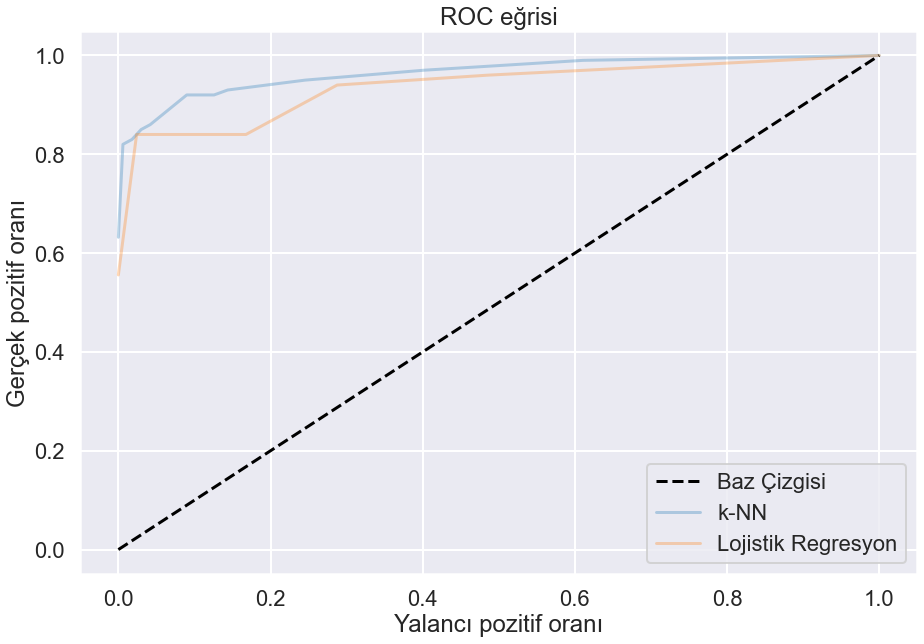

In [31]:
knn_prob = grid.predict_proba(standard_xtest)[:, 1]
logreg_prob = grid_log.predict_proba(standard_xtest)[:, 1]
fprlog, tprlog, thresholdslog = roc_curve(y_test, logreg_prob)
fpr, tpr, thresholds = roc_curve(y_test, knn_prob)
sns.set_style("darkgrid")
sns.set_context("poster")
ax = plt.subplots(figsize=(15, 10))
plt.plot([0, 1], [0, 1], 'k--')
sns.lineplot(fpr, tpr, alpha=0.3, ci=None)
sns.lineplot(fprlog, tprlog, alpha=0.3, ci=None)
plt.xlabel('Yalancı pozitif oranı')
plt.ylabel('Gerçek pozitif oranı')
plt.title('ROC eğrisi')
plt.legend(["Baz Çizgisi", "k-NN", "Lojistik Regresyon"])
plt.show()